<a href="https://colab.research.google.com/github/FECONGroup01/FECON-Project/blob/main/Traditional_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
# Read back in as dataframe
tm = pd.read_csv('TATAMOTORS.csv')
# Convert Date column to datetime
tm['Date'] = pd.to_datetime(tm['Date'])

In [ ]:
tm

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,430.950012,436.399994,422.250000,424.450012,424.450012,6807536
1,2018-01-02,428.850006,440.850006,422.000000,439.299988,439.299988,15331261
2,2018-01-03,440.399994,441.399994,431.950012,433.899994,433.899994,9794953
3,2018-01-04,430.000000,433.299988,425.750000,429.950012,429.950012,8395377
4,2018-01-05,431.250000,436.350006,429.799988,431.600006,431.600006,7021611
...,...,...,...,...,...,...,...
241,2018-12-24,176.250000,177.850006,171.500000,172.500000,172.500000,11374468
242,2018-12-26,171.449997,172.199997,167.600006,170.899994,170.899994,12044191
243,2018-12-27,172.750000,173.399994,167.699997,168.250000,168.250000,15231581
244,2018-12-28,169.399994,172.199997,169.149994,170.850006,170.850006,8669584


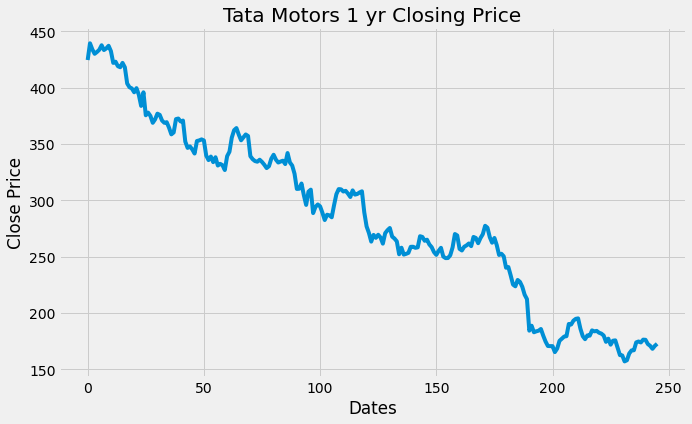

In [ ]:
#Visualization of the data
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Price')
plt.plot(tm['Close'])
plt.title('Tata Motors 1 yr Closing Price')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):
#Determing rolling statistics
  rolmean = timeseries.rolling(12).mean()
  rolstd = timeseries.rolling(12).std()
#Plot rolling statistics:
  fig = plt.figure(figsize=(12, 8))
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()
#Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
      print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
      print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
      print(dfoutput)

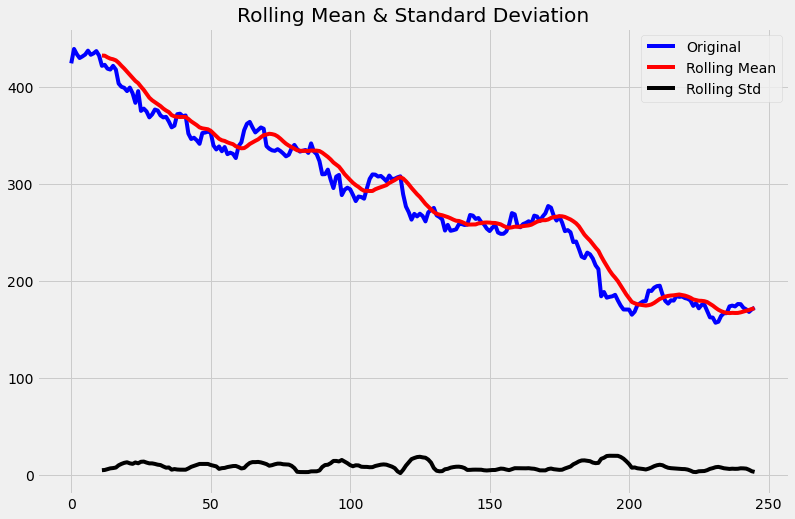

Results of Dickey-Fuller Test:
p-value = 0.7197. The series is likely non-stationary.
Test Statistic                  -1.088401
p-value                          0.719675
#Lags Used                       0.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
dtype: float64
p-value = 0.7197. The series is likely non-stationary.
Test Statistic                  -1.088401
p-value                          0.719675
#Lags Used                       0.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
dtype: float64
p-value = 0.7197. The series is likely non-stationary.
Test Statistic                  -1.088401
p-value                          0.719675
#Lags Used                       0.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64


In [ ]:
df_close = tm['Close']
test_stationarity(df_close)

In [ ]:
#x_train, x_test = df_close[3:int(len(df_close)*0.8)], df_close[int(len(df_close)*0.8):]
#plt.figure(figsize=(10,6))
#plt.grid(True)
#plt.xlabel('Dates')
#plt.ylabel('Closing Price')
#plt.plot(df_close, 'green', label='Train data')
#plt.plot(x_test, 'blue', label='Test data')
#plt.legend()

# Set target series
# Create train data set
split_date = '2018-10-17'
split_index = np.where(tm.Date == split_date)[0][0]
x_train = tm.loc[tm['Date'] <= split_date]['Close']
# Create test data set
#test_split_date = '2018-11-20'
#test_split_index = np.where(tm.Date == test_split_date)[0][0]
x_test = tm.loc[tm['Date'] >=split_date]['Close']
# Create valid data set
#valid_split_index = (train_split_index.max(),test_split_index.min())
#x_valid = tm.loc[(tm['Date'] < test_split_date) & (tm['Date'] > train_split_date)]['Close']
#printed index values are: 
#0-5521(train), 5522-6527(valid), 6528-6947(test)

<Figure size 720x432 with 0 Axes>

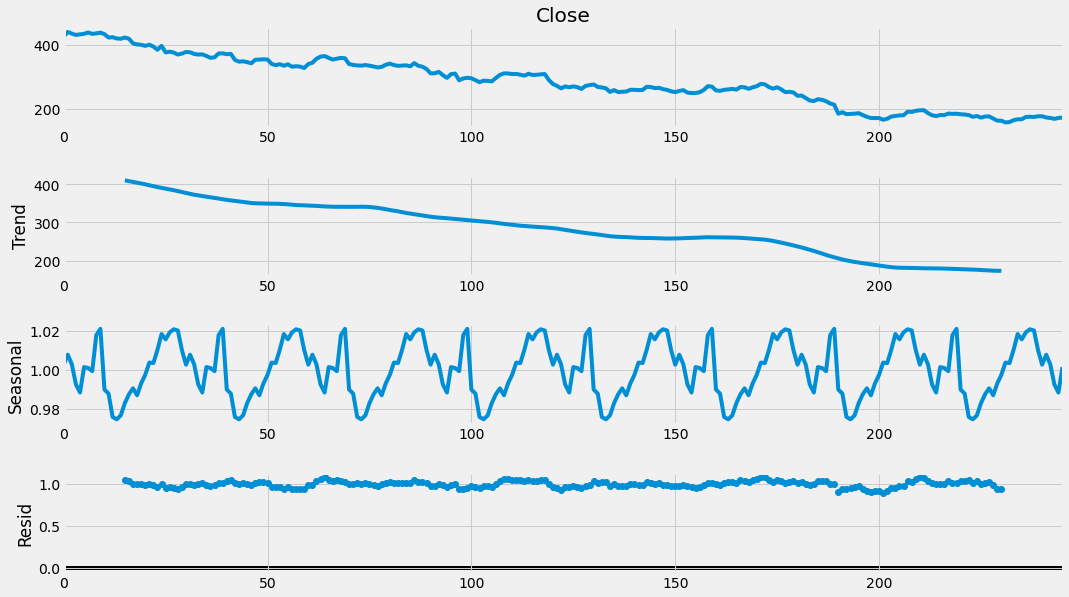

In [ ]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [ ]:
# Get the difference of each Adj Close point
tm_close_diff_1 = series.diff()
# Drop the first row as it will have a null value in this column
tm_close_diff_1.dropna(inplace=True)

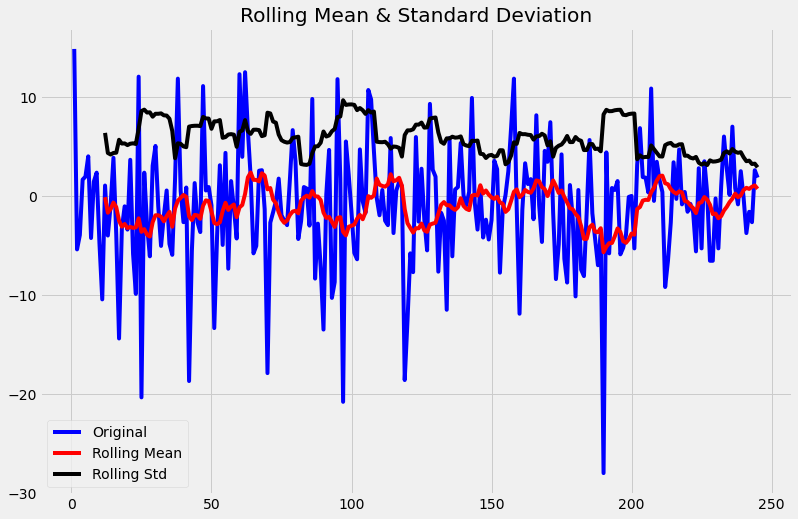

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.
p-value = 0.0000. The series is likely stationary.


In [ ]:
test_stationarity(tm_close_diff_1)

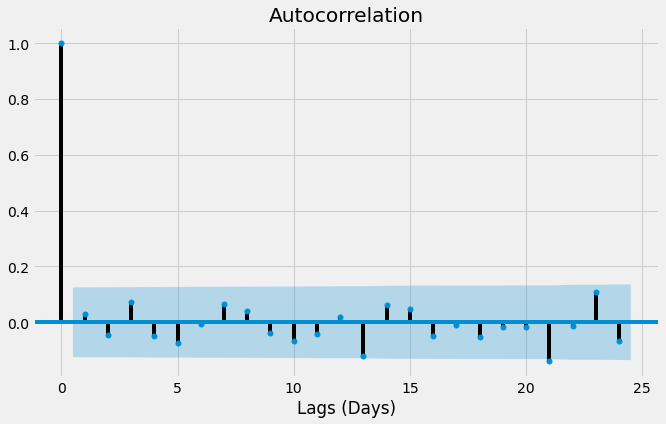

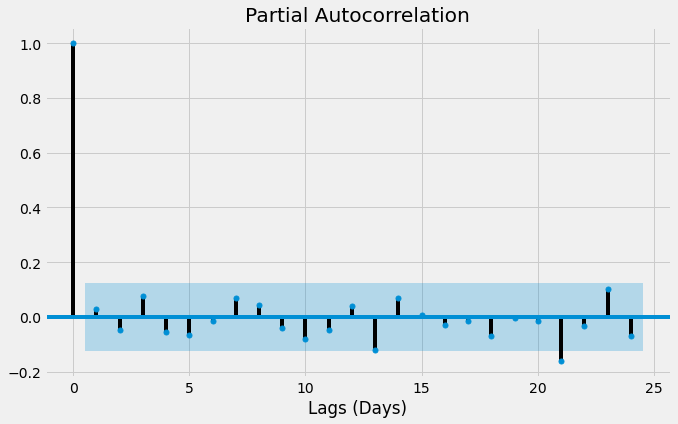

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(tm_close_diff_1)
plt.xlabel('Lags (Days)')
plt.show()
# Break these into two separate cells
plot_pacf(tm_close_diff_1)
plt.xlabel('Lags (Days)')
plt.show()

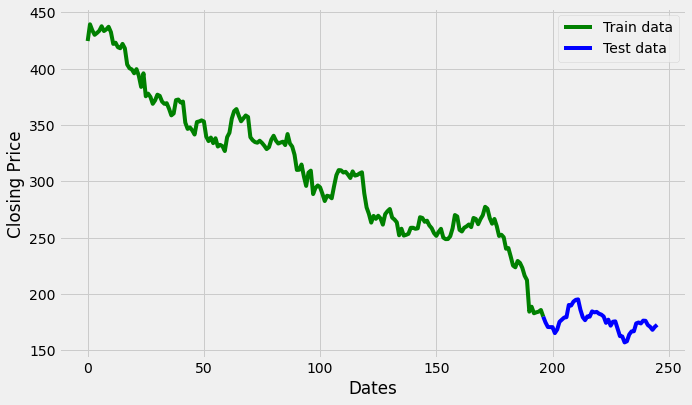

In [ ]:
#split data into train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(x_train, 'green', label='Train data')
plt.plot(x_test, 'blue', label='Test data')
plt.legend()

In [ ]:
# Use this block to
from statsmodels.tsa.arima_model import ARIMA
# fit model
tm_arima = ARIMA(x_train, order=(0,1,0))
tm_arima_fit = tm_arima.fit(disp=0)
print(tm_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  196
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -643.285
Method:                           css   S.D. of innovations              6.444
Date:                Sun, 25 Apr 2021   AIC                           1290.569
Time:                        08:25:20   BIC                           1297.126
Sample:                             1   HQIC                          1293.224
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2474      0.460     -2.710      0.007      -2.150      -0.345


In [ ]:
# Use this block to
from statsmodels.tsa.arima_model import ARIMA
# fit model
tm_arima = ARIMA(x_train, order=(1,1,0))
tm_arima_fit = tm_arima.fit(disp=0)
print(tm_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  196
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -643.279
Method:                       css-mle   S.D. of innovations              6.444
Date:                Sun, 25 Apr 2021   AIC                           1292.558
Time:                        08:25:24   BIC                           1302.393
Sample:                             1   HQIC                          1296.540
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.2470      0.464     -2.689      0.007      -2.156      -0.338
ar.L1.D.Close     0.0076      0.073      0.105      0.917      -0.135       0.150
                                    Root

In [ ]:
# Use this block to
from statsmodels.tsa.arima_model import ARIMA
# fit model
tm_arima = ARIMA(x_train, order=(0,1,1))
tm_arima_fit = tm_arima.fit(disp=0)
print(tm_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  196
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -643.278
Method:                       css-mle   S.D. of innovations              6.444
Date:                Sun, 25 Apr 2021   AIC                           1292.557
Time:                        08:25:27   BIC                           1302.391
Sample:                             1   HQIC                          1296.538
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.2469      0.464     -2.685      0.007      -2.157      -0.337
ma.L1.D.Close     0.0088      0.078      0.113      0.910      -0.145       0.162
                                    Root

In [ ]:
# Use this block to
from statsmodels.tsa.arima_model import ARIMA
# fit model
tm_arima = ARIMA(x_train, order=(1,1,1))
tm_arima_fit = tm_arima.fit(disp=0)
print(tm_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  196
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -642.728
Method:                       css-mle   S.D. of innovations              6.425
Date:                Sun, 25 Apr 2021   AIC                           1293.457
Time:                        08:25:30   BIC                           1306.569
Sample:                             1   HQIC                          1298.765
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.2472      0.474     -2.630      0.009      -2.177      -0.318
ar.L1.D.Close    -0.6851      0.272     -2.515      0.012      -1.219      -0.151
ma.L1.D.Close     0.7414      0.249     

In [ ]:
model_autoARIMA = auto_arima(x_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1290.569, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1292.558, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1292.556, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1295.780, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1293.456, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.427 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  197
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -643.285
Date:                Sun, 25 Apr 2021   AIC                           1290.569
Time:                        08:25:34   BIC                           1297.126
Sample:                             0   HQIC                          1293.224
                                - 197                                       

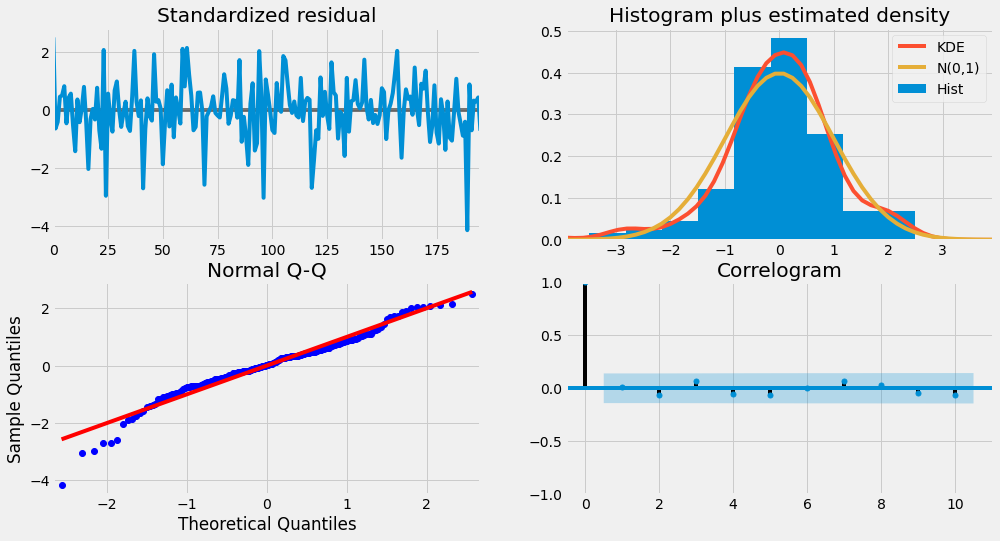

In [ ]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
model = ARIMA(x_train, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  196
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -643.285
Method:                           css   S.D. of innovations              6.444
Date:                Sun, 25 Apr 2021   AIC                           1290.569
Time:                        08:25:48   BIC                           1297.126
Sample:                             1   HQIC                          1293.224
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2474      0.460     -2.710      0.007      -2.150      -0.345


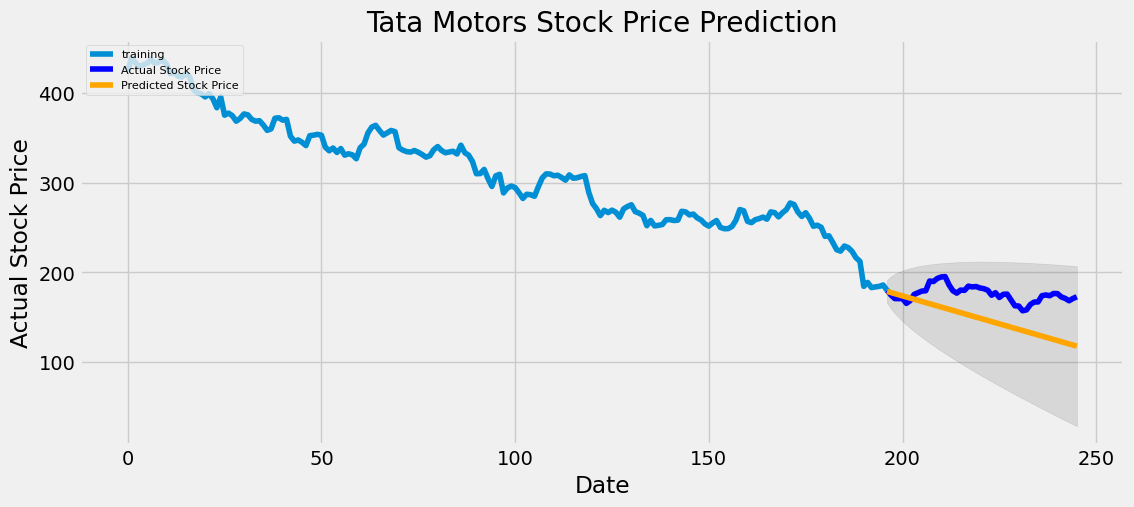

In [ ]:
fc, se, conf = fitted.forecast(50, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=x_test.index)
lower_series = pd.Series(conf[:, 0], index=x_test.index)
upper_series = pd.Series(conf[:, 1], index=x_test.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(x_train, label='training')
plt.plot(x_test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                color='k', alpha=.10)
plt.title('Tata Motors Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
mse = mean_squared_error(x_test, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(x_test, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(x_test, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - x_test)/np.abs(x_test))
print('MAPE: '+str(mape))

MSE: 1040.3495608974142
MAE: 28.618708410510525
RMSE: 32.25445024949913
MAPE: 0.1629697013643648


In [ ]:
As Mape is 1.66% hence model is 98.34% accurate